# Facial Keypoints Detection

## 数据预处理

### 导入模块

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 导入数据

#### 图片像素96*96
#### 有15个特征：
left_eye_center, 
right_eye_center, 
left_eye_inner_corner, 
left_eye_outer_corner, 
right_eye_inner_corner, 
right_eye_outer_corner, 
left_eyebrow_inner_end, 
left_eyebrow_outer_end, 
right_eyebrow_inner_end, 
right_eyebrow_outer_end, 
nose_tip, 
mouth_left_corner, 
mouth_right_corner,
mouth_center_top_lip,
mouth_center_bottom_lip

In [2]:
train_data = pd.read_csv('../data/training.csv')
test_data = pd.read_csv('../data/test.csv')
# train_data = train_data.dropna().reset_index(drop=True)
# 补全缺失数据
train_data.fillna(method='ffill',inplace=True)
test_data.fillna(method='ffill',inplace=True)
print(train_data.info())
# print(train_data.head())
# print(train_data.describe())
# print(test_data.info())
# print(test_data.head())
# print(test_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7049 non-null float64
left_eye_center_y            7049 non-null float64
right_eye_center_x           7049 non-null float64
right_eye_center_y           7049 non-null float64
left_eye_inner_corner_x      7049 non-null float64
left_eye_inner_corner_y      7049 non-null float64
left_eye_outer_corner_x      7049 non-null float64
left_eye_outer_corner_y      7049 non-null float64
right_eye_inner_corner_x     7049 non-null float64
right_eye_inner_corner_y     7049 non-null float64
right_eye_outer_corner_x     7049 non-null float64
right_eye_outer_corner_y     7049 non-null float64
left_eyebrow_inner_end_x     7049 non-null float64
left_eyebrow_inner_end_y     7049 non-null float64
left_eyebrow_outer_end_x     7049 non-null float64
left_eyebrow_outer_end_y     7049 non-null float64
right_eyebrow_inner_end_x    7049 non-null float64
right_eyebrow_inner_end_y 

#### 提取图片

In [3]:
def get_images(data):
    images = data['Image']
    imgs = []
    for i in range(images.shape[0]):
        imgs.append(images[i].split(' '))
    imgs = np.array(imgs,dtype=int)
    return imgs

#提取训练集和测试集中图片
train_imgs = get_images(train_data).reshape(-1,96,96,1)
test_imgs = get_images(test_data).reshape(-1,96,96,1)

#### 取9张图片查看效果

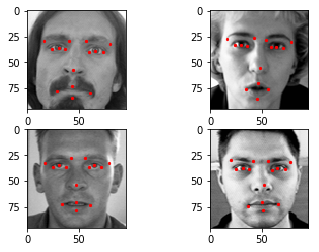

In [4]:
for i in range(4):
    plt.subplot(2,2,i+1)
    img = train_imgs[i].reshape(96,96)
    plt.imshow(img,cmap='gray')
    plt.scatter(train_data.iloc[i,[j for j in range(0,30,2)]],train_data.iloc[i,[j for j in range(1,30,2)]],s=5,c='red')
plt.show()

## 使用KERAS框架

In [5]:
from keras.layers import Conv2D, Dense, Dropout, MaxPool2D, Flatten
from keras.optimizers import Adam
from keras.models import Sequential

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=(5,5),padding='Same',activation='relu',input_shape=(96,96,1)))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters=64, kernel_size=(5,5),padding='Same',activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Flatten())
model.add(Flatten(input_shape=(96,96,1)))
# model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(30))

In [7]:
# 优化
adam = Adam(lr=0.001)
model.compile(optimizer=adam,loss='mse',metrics=['mae','accuracy'])

In [8]:
# 训练模型
model.fit(train_imgs,train_data.iloc[:,:-1],epochs=1000,batch_size=128,validation_split=0.2)

Train on 5639 samples, validate on 1410 samples
Epoch 1/1000
5639/5639 [==============================] - 3s 462us/step - loss: 19234.9498 - mean_absolute_error: 77.1744 - acc: 0.0411 - val_loss: 2710.1088 - val_mean_absolute_error: 48.5345 - val_acc: 0.0000e+00
Epoch 2/1000
5639/5639 [==============================] - 2s 332us/step - loss: 2668.8140 - mean_absolute_error: 48.1103 - acc: 0.0144 - val_loss: 2707.2191 - val_mean_absolute_error: 48.5063 - val_acc: 0.0000e+00
Epoch 3/1000
5639/5639 [==============================] - 2s 341us/step - loss: 2663.2638 - mean_absolute_error: 48.0696 - acc: 0.0145 - val_loss: 2703.9465 - val_mean_absolute_error: 48.4740 - val_acc: 0.0000e+00
Epoch 4/1000
5639/5639 [==============================] - 2s 347us/step - loss: 2659.9043 - mean_absolute_error: 48.0360 - acc: 0.0145 - val_loss: 2700.4498 - val_mean_absolute_error: 48.4393 - val_acc: 0.0000e+00
Epoch 5/1000
5639/5639 [==============================] - 2s 337us/step - loss: 2656.3595 - mea

Epoch 39/1000
5639/5639 [==============================] - 2s 328us/step - loss: 2514.7537 - mean_absolute_error: 46.5308 - acc: 0.0000e+00 - val_loss: 2553.5861 - val_mean_absolute_error: 46.9284 - val_acc: 0.0000e+00
Epoch 40/1000
5639/5639 [==============================] - 2s 324us/step - loss: 2510.4096 - mean_absolute_error: 46.4849 - acc: 0.0000e+00 - val_loss: 2549.1986 - val_mean_absolute_error: 46.8824 - val_acc: 0.0000e+00
Epoch 41/1000
5639/5639 [==============================] - 2s 323us/step - loss: 2506.0563 - mean_absolute_error: 46.4388 - acc: 0.0000e+00 - val_loss: 2544.8018 - val_mean_absolute_error: 46.8363 - val_acc: 0.0000e+00
Epoch 42/1000
5639/5639 [==============================] - 2s 326us/step - loss: 2501.6927 - mean_absolute_error: 46.3926 - acc: 0.0000e+00 - val_loss: 2540.3949 - val_mean_absolute_error: 46.7900 - val_acc: 0.0000e+00
Epoch 43/1000
5639/5639 [==============================] - 2s 326us/step - loss: 2497.3208 - mean_absolute_error: 46.3463 - 

Epoch 77/1000
5639/5639 [==============================] - 2s 325us/step - loss: 2333.8907 - mean_absolute_error: 44.6106 - acc: 0.0145 - val_loss: 2370.1930 - val_mean_absolute_error: 44.9998 - val_acc: 0.0000e+00
Epoch 78/1000
5639/5639 [==============================] - 2s 321us/step - loss: 2327.9796 - mean_absolute_error: 44.5480 - acc: 0.0145 - val_loss: 2364.1535 - val_mean_absolute_error: 44.9365 - val_acc: 0.0000e+00
Epoch 79/1000
5639/5639 [==============================] - 2s 322us/step - loss: 2321.9323 - mean_absolute_error: 44.4839 - acc: 0.0145 - val_loss: 2357.9712 - val_mean_absolute_error: 44.8716 - val_acc: 0.0000e+00
Epoch 80/1000
5639/5639 [==============================] - 2s 326us/step - loss: 2315.7423 - mean_absolute_error: 44.4182 - acc: 0.0145 - val_loss: 2351.6421 - val_mean_absolute_error: 44.8051 - val_acc: 0.0000e+00
Epoch 81/1000
5639/5639 [==============================] - 2s 325us/step - loss: 2309.4013 - mean_absolute_error: 44.3510 - acc: 0.0145 - va

5639/5639 [==============================] - 2s 346us/step - loss: 1938.8948 - mean_absolute_error: 40.3042 - acc: 0.0145 - val_loss: 1965.7685 - val_mean_absolute_error: 40.6237 - val_acc: 0.0000e+00
Epoch 116/1000
5639/5639 [==============================] - 2s 334us/step - loss: 1921.7054 - mean_absolute_error: 40.1082 - acc: 0.0145 - val_loss: 1948.2020 - val_mean_absolute_error: 40.4245 - val_acc: 0.0000e+00
Epoch 117/1000
5639/5639 [==============================] - 2s 330us/step - loss: 1904.0933 - mean_absolute_error: 39.9065 - acc: 0.0145 - val_loss: 1930.2115 - val_mean_absolute_error: 40.2196 - val_acc: 0.0000e+00
Epoch 118/1000
5639/5639 [==============================] - 2s 340us/step - loss: 1886.0550 - mean_absolute_error: 39.6988 - acc: 0.0145 - val_loss: 1911.7866 - val_mean_absolute_error: 40.0087 - val_acc: 0.0000e+00
Epoch 119/1000
5639/5639 [==============================] - 2s 327us/step - loss: 1867.5922 - mean_absolute_error: 39.4852 - acc: 0.0145 - val_loss: 18

5639/5639 [==============================] - 2s 329us/step - loss: 237.3940 - mean_absolute_error: 11.1737 - acc: 0.6052 - val_loss: 241.2710 - val_mean_absolute_error: 11.1931 - val_acc: 0.6872
Epoch 193/1000
5639/5639 [==============================] - 2s 327us/step - loss: 225.7141 - mean_absolute_error: 10.8000 - acc: 0.6052 - val_loss: 229.4485 - val_mean_absolute_error: 10.8126 - val_acc: 0.6872
Epoch 194/1000
5639/5639 [==============================] - 2s 324us/step - loss: 214.4911 - mean_absolute_error: 10.4336 - acc: 0.6052 - val_loss: 218.0609 - val_mean_absolute_error: 10.4382 - val_acc: 0.6872
Epoch 195/1000
5639/5639 [==============================] - 2s 327us/step - loss: 203.7137 - mean_absolute_error: 10.0749 - acc: 0.6052 - val_loss: 207.1367 - val_mean_absolute_error: 10.0725 - val_acc: 0.6872
Epoch 196/1000
5639/5639 [==============================] - 2s 328us/step - loss: 193.3832 - mean_absolute_error: 9.7244 - acc: 0.6052 - val_loss: 196.6490 - val_mean_absolute

Epoch 232/1000
5639/5639 [==============================] - 2s 325us/step - loss: 25.6269 - mean_absolute_error: 3.0833 - acc: 0.6052 - val_loss: 23.4144 - val_mean_absolute_error: 2.7398 - val_acc: 0.6872
Epoch 233/1000
5639/5639 [==============================] - 2s 323us/step - loss: 24.3361 - mean_absolute_error: 3.0181 - acc: 0.6052 - val_loss: 22.0112 - val_mean_absolute_error: 2.6640 - val_acc: 0.6872
Epoch 234/1000
5639/5639 [==============================] - 2s 326us/step - loss: 23.1369 - mean_absolute_error: 2.9562 - acc: 0.6052 - val_loss: 20.7029 - val_mean_absolute_error: 2.5921 - val_acc: 0.6872
Epoch 235/1000
5639/5639 [==============================] - 2s 336us/step - loss: 22.0192 - mean_absolute_error: 2.8953 - acc: 0.6052 - val_loss: 19.4784 - val_mean_absolute_error: 2.5206 - val_acc: 0.6872
Epoch 236/1000
5639/5639 [==============================] - 2s 349us/step - loss: 20.9823 - mean_absolute_error: 2.8382 - acc: 0.6052 - val_loss: 18.3447 - val_mean_absolute_er

Epoch 272/1000
5639/5639 [==============================] - 2s 322us/step - loss: 10.1777 - mean_absolute_error: 2.0548 - acc: 0.6052 - val_loss: 5.9999 - val_mean_absolute_error: 1.5020 - val_acc: 0.6865
Epoch 273/1000
5639/5639 [==============================] - 2s 324us/step - loss: 10.1583 - mean_absolute_error: 2.0505 - acc: 0.6052 - val_loss: 5.9680 - val_mean_absolute_error: 1.4957 - val_acc: 0.6865
Epoch 274/1000
5639/5639 [==============================] - 2s 325us/step - loss: 10.1419 - mean_absolute_error: 2.0501 - acc: 0.6052 - val_loss: 5.9548 - val_mean_absolute_error: 1.4938 - val_acc: 0.6865
Epoch 275/1000
5639/5639 [==============================] - 2s 324us/step - loss: 10.1273 - mean_absolute_error: 2.0453 - acc: 0.6052 - val_loss: 5.9193 - val_mean_absolute_error: 1.4853 - val_acc: 0.6865
Epoch 276/1000
5639/5639 [==============================] - 2s 324us/step - loss: 10.1153 - mean_absolute_error: 2.0421 - acc: 0.6052 - val_loss: 5.8953 - val_mean_absolute_error: 

Epoch 312/1000
5639/5639 [==============================] - 2s 329us/step - loss: 10.0541 - mean_absolute_error: 2.0250 - acc: 0.6052 - val_loss: 5.7864 - val_mean_absolute_error: 1.4468 - val_acc: 0.6865
Epoch 313/1000
5639/5639 [==============================] - 2s 334us/step - loss: 10.0534 - mean_absolute_error: 2.0176 - acc: 0.6052 - val_loss: 5.7553 - val_mean_absolute_error: 1.4368 - val_acc: 0.6865
Epoch 314/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0532 - mean_absolute_error: 2.0199 - acc: 0.6052 - val_loss: 5.7728 - val_mean_absolute_error: 1.4413 - val_acc: 0.6865
Epoch 315/1000
5639/5639 [==============================] - 2s 325us/step - loss: 10.0532 - mean_absolute_error: 2.0201 - acc: 0.6052 - val_loss: 5.7635 - val_mean_absolute_error: 1.4390 - val_acc: 0.6865
Epoch 316/1000
5639/5639 [==============================] - 2s 333us/step - loss: 10.0536 - mean_absolute_error: 2.0220 - acc: 0.6052 - val_loss: 5.7762 - val_mean_absolute_error: 

Epoch 352/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0545 - mean_absolute_error: 2.0194 - acc: 0.6052 - val_loss: 5.7651 - val_mean_absolute_error: 1.4386 - val_acc: 0.6865
Epoch 353/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0544 - mean_absolute_error: 2.0190 - acc: 0.6052 - val_loss: 5.7587 - val_mean_absolute_error: 1.4374 - val_acc: 0.6865
Epoch 354/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0547 - mean_absolute_error: 2.0162 - acc: 0.6052 - val_loss: 5.7673 - val_mean_absolute_error: 1.4401 - val_acc: 0.6865
Epoch 355/1000
5639/5639 [==============================] - 2s 325us/step - loss: 10.0540 - mean_absolute_error: 2.0209 - acc: 0.6052 - val_loss: 5.7494 - val_mean_absolute_error: 1.4335 - val_acc: 0.6865
Epoch 356/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0545 - mean_absolute_error: 2.0151 - acc: 0.6052 - val_loss: 5.7453 - val_mean_absolute_error: 

Epoch 392/1000
5639/5639 [==============================] - 2s 341us/step - loss: 10.0547 - mean_absolute_error: 2.0209 - acc: 0.6052 - val_loss: 5.7583 - val_mean_absolute_error: 1.4358 - val_acc: 0.6865
Epoch 393/1000
5639/5639 [==============================] - 2s 324us/step - loss: 10.0550 - mean_absolute_error: 2.0144 - acc: 0.6052 - val_loss: 5.7566 - val_mean_absolute_error: 1.4435 - val_acc: 0.6865
Epoch 394/1000
5639/5639 [==============================] - 2s 322us/step - loss: 10.0557 - mean_absolute_error: 2.0249 - acc: 0.6052 - val_loss: 5.7714 - val_mean_absolute_error: 1.4386 - val_acc: 0.6865
Epoch 395/1000
5639/5639 [==============================] - 2s 325us/step - loss: 10.0574 - mean_absolute_error: 2.0172 - acc: 0.6052 - val_loss: 5.7848 - val_mean_absolute_error: 1.4468 - val_acc: 0.6865
Epoch 396/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0567 - mean_absolute_error: 2.0171 - acc: 0.6052 - val_loss: 5.8154 - val_mean_absolute_error: 

Epoch 432/1000
5639/5639 [==============================] - 2s 323us/step - loss: 10.0557 - mean_absolute_error: 2.0105 - acc: 0.6052 - val_loss: 5.7875 - val_mean_absolute_error: 1.4512 - val_acc: 0.6865
Epoch 433/1000
5639/5639 [==============================] - 2s 323us/step - loss: 10.0570 - mean_absolute_error: 2.0240 - acc: 0.6052 - val_loss: 5.7825 - val_mean_absolute_error: 1.4434 - val_acc: 0.6865
Epoch 434/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0563 - mean_absolute_error: 2.0213 - acc: 0.6052 - val_loss: 5.7511 - val_mean_absolute_error: 1.4348 - val_acc: 0.6865
Epoch 435/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0550 - mean_absolute_error: 2.0164 - acc: 0.6052 - val_loss: 5.7592 - val_mean_absolute_error: 1.4431 - val_acc: 0.6865
Epoch 436/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0562 - mean_absolute_error: 2.0228 - acc: 0.6052 - val_loss: 5.7867 - val_mean_absolute_error: 

Epoch 472/1000
5639/5639 [==============================] - 2s 325us/step - loss: 10.0583 - mean_absolute_error: 2.0258 - acc: 0.6052 - val_loss: 5.7620 - val_mean_absolute_error: 1.4351 - val_acc: 0.6865
Epoch 473/1000
5639/5639 [==============================] - 2s 324us/step - loss: 10.0573 - mean_absolute_error: 2.0226 - acc: 0.6052 - val_loss: 5.7840 - val_mean_absolute_error: 1.4423 - val_acc: 0.6865
Epoch 474/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0576 - mean_absolute_error: 2.0269 - acc: 0.6052 - val_loss: 5.7511 - val_mean_absolute_error: 1.4288 - val_acc: 0.6865
Epoch 475/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0565 - mean_absolute_error: 2.0208 - acc: 0.6052 - val_loss: 5.7186 - val_mean_absolute_error: 1.4216 - val_acc: 0.6865
Epoch 476/1000
5639/5639 [==============================] - 2s 341us/step - loss: 10.0576 - mean_absolute_error: 2.0212 - acc: 0.6052 - val_loss: 5.7306 - val_mean_absolute_error: 

Epoch 512/1000
5639/5639 [==============================] - 2s 323us/step - loss: 10.0581 - mean_absolute_error: 2.0267 - acc: 0.6052 - val_loss: 5.7269 - val_mean_absolute_error: 1.4244 - val_acc: 0.6865
Epoch 513/1000
5639/5639 [==============================] - 2s 324us/step - loss: 10.0562 - mean_absolute_error: 2.0198 - acc: 0.6052 - val_loss: 5.7546 - val_mean_absolute_error: 1.4353 - val_acc: 0.6865
Epoch 514/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0649 - mean_absolute_error: 2.0119 - acc: 0.6052 - val_loss: 5.7468 - val_mean_absolute_error: 1.4411 - val_acc: 0.6865
Epoch 515/1000
5639/5639 [==============================] - 2s 327us/step - loss: 10.0570 - mean_absolute_error: 2.0198 - acc: 0.6052 - val_loss: 5.7681 - val_mean_absolute_error: 1.4382 - val_acc: 0.6865
Epoch 516/1000
5639/5639 [==============================] - 2s 325us/step - loss: 10.0560 - mean_absolute_error: 2.0188 - acc: 0.6052 - val_loss: 5.7509 - val_mean_absolute_error: 

Epoch 552/1000
5639/5639 [==============================] - 2s 324us/step - loss: 10.0565 - mean_absolute_error: 2.0233 - acc: 0.6052 - val_loss: 5.7311 - val_mean_absolute_error: 1.4291 - val_acc: 0.6865
Epoch 553/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0572 - mean_absolute_error: 2.0284 - acc: 0.6052 - val_loss: 5.7452 - val_mean_absolute_error: 1.4265 - val_acc: 0.6865
Epoch 554/1000
5639/5639 [==============================] - 2s 325us/step - loss: 10.0559 - mean_absolute_error: 2.0186 - acc: 0.6052 - val_loss: 5.7275 - val_mean_absolute_error: 1.4259 - val_acc: 0.6865
Epoch 555/1000
5639/5639 [==============================] - 2s 325us/step - loss: 10.0570 - mean_absolute_error: 2.0128 - acc: 0.6052 - val_loss: 5.7544 - val_mean_absolute_error: 1.4382 - val_acc: 0.6865
Epoch 556/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0552 - mean_absolute_error: 2.0170 - acc: 0.6052 - val_loss: 5.7909 - val_mean_absolute_error: 

Epoch 592/1000
5639/5639 [==============================] - 2s 344us/step - loss: 10.0564 - mean_absolute_error: 2.0269 - acc: 0.6052 - val_loss: 5.7771 - val_mean_absolute_error: 1.4367 - val_acc: 0.6865
Epoch 593/1000
5639/5639 [==============================] - 2s 350us/step - loss: 10.0573 - mean_absolute_error: 2.0243 - acc: 0.6052 - val_loss: 5.7552 - val_mean_absolute_error: 1.4341 - val_acc: 0.6865
Epoch 594/1000
5639/5639 [==============================] - 2s 330us/step - loss: 10.0561 - mean_absolute_error: 2.0205 - acc: 0.6052 - val_loss: 5.8076 - val_mean_absolute_error: 1.4538 - val_acc: 0.6865
Epoch 595/1000
5639/5639 [==============================] - 2s 325us/step - loss: 10.0574 - mean_absolute_error: 2.0240 - acc: 0.6052 - val_loss: 5.7570 - val_mean_absolute_error: 1.4346 - val_acc: 0.6865
Epoch 596/1000
5639/5639 [==============================] - 2s 329us/step - loss: 10.0566 - mean_absolute_error: 2.0190 - acc: 0.6052 - val_loss: 5.7423 - val_mean_absolute_error: 

Epoch 632/1000
5639/5639 [==============================] - 2s 337us/step - loss: 10.0571 - mean_absolute_error: 2.0144 - acc: 0.6052 - val_loss: 5.7738 - val_mean_absolute_error: 1.4458 - val_acc: 0.6865
Epoch 633/1000
5639/5639 [==============================] - 2s 368us/step - loss: 10.0553 - mean_absolute_error: 2.0239 - acc: 0.6052 - val_loss: 5.7853 - val_mean_absolute_error: 1.4420 - val_acc: 0.6865
Epoch 634/1000
5639/5639 [==============================] - 2s 382us/step - loss: 10.0562 - mean_absolute_error: 2.0131 - acc: 0.6052 - val_loss: 5.7925 - val_mean_absolute_error: 1.4550 - val_acc: 0.6865
Epoch 635/1000
5639/5639 [==============================] - 2s 341us/step - loss: 10.0569 - mean_absolute_error: 2.0253 - acc: 0.6052 - val_loss: 5.7830 - val_mean_absolute_error: 1.4439 - val_acc: 0.6865
Epoch 636/1000
5639/5639 [==============================] - 2s 333us/step - loss: 10.0563 - mean_absolute_error: 2.0247 - acc: 0.6052 - val_loss: 5.7861 - val_mean_absolute_error: 

Epoch 672/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0586 - mean_absolute_error: 2.0307 - acc: 0.6052 - val_loss: 5.7238 - val_mean_absolute_error: 1.4163 - val_acc: 0.6865
Epoch 673/1000
5639/5639 [==============================] - 2s 341us/step - loss: 10.0572 - mean_absolute_error: 2.0227 - acc: 0.6052 - val_loss: 5.7294 - val_mean_absolute_error: 1.4191 - val_acc: 0.6865
Epoch 674/1000
5639/5639 [==============================] - 2s 330us/step - loss: 10.0587 - mean_absolute_error: 2.0091 - acc: 0.6052 - val_loss: 5.7495 - val_mean_absolute_error: 1.4398 - val_acc: 0.6865
Epoch 675/1000
5639/5639 [==============================] - 2s 323us/step - loss: 10.0615 - mean_absolute_error: 2.0290 - acc: 0.6052 - val_loss: 5.7994 - val_mean_absolute_error: 1.4462 - val_acc: 0.6865
Epoch 676/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0573 - mean_absolute_error: 2.0191 - acc: 0.6052 - val_loss: 5.7546 - val_mean_absolute_error: 

Epoch 712/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0555 - mean_absolute_error: 2.0196 - acc: 0.6052 - val_loss: 5.7433 - val_mean_absolute_error: 1.4372 - val_acc: 0.6865
Epoch 713/1000
5639/5639 [==============================] - 2s 325us/step - loss: 10.0636 - mean_absolute_error: 2.0260 - acc: 0.6052 - val_loss: 5.8473 - val_mean_absolute_error: 1.4698 - val_acc: 0.6865
Epoch 714/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0594 - mean_absolute_error: 2.0275 - acc: 0.6052 - val_loss: 5.7709 - val_mean_absolute_error: 1.4390 - val_acc: 0.6865
Epoch 715/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0566 - mean_absolute_error: 2.0190 - acc: 0.6052 - val_loss: 5.7347 - val_mean_absolute_error: 1.4318 - val_acc: 0.6865
Epoch 716/1000
5639/5639 [==============================] - 2s 330us/step - loss: 10.0558 - mean_absolute_error: 2.0176 - acc: 0.6052 - val_loss: 5.8122 - val_mean_absolute_error: 

Epoch 752/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0561 - mean_absolute_error: 2.0187 - acc: 0.6052 - val_loss: 5.7828 - val_mean_absolute_error: 1.4399 - val_acc: 0.6865
Epoch 753/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0574 - mean_absolute_error: 2.0252 - acc: 0.6052 - val_loss: 5.7200 - val_mean_absolute_error: 1.4222 - val_acc: 0.6865
Epoch 754/1000
5639/5639 [==============================] - 2s 323us/step - loss: 10.0569 - mean_absolute_error: 2.0192 - acc: 0.6052 - val_loss: 5.7898 - val_mean_absolute_error: 1.4477 - val_acc: 0.6865
Epoch 755/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0554 - mean_absolute_error: 2.0191 - acc: 0.6052 - val_loss: 5.7796 - val_mean_absolute_error: 1.4449 - val_acc: 0.6865
Epoch 756/1000
5639/5639 [==============================] - 2s 324us/step - loss: 10.0575 - mean_absolute_error: 2.0128 - acc: 0.6052 - val_loss: 5.7893 - val_mean_absolute_error: 

Epoch 792/1000
5639/5639 [==============================] - 2s 331us/step - loss: 10.0575 - mean_absolute_error: 2.0253 - acc: 0.6052 - val_loss: 5.7822 - val_mean_absolute_error: 1.4430 - val_acc: 0.6865
Epoch 793/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0568 - mean_absolute_error: 2.0203 - acc: 0.6052 - val_loss: 5.7900 - val_mean_absolute_error: 1.4433 - val_acc: 0.6865
Epoch 794/1000
5639/5639 [==============================] - 2s 332us/step - loss: 10.0569 - mean_absolute_error: 2.0212 - acc: 0.6052 - val_loss: 5.7995 - val_mean_absolute_error: 1.4507 - val_acc: 0.6865
Epoch 795/1000
5639/5639 [==============================] - 2s 325us/step - loss: 10.0569 - mean_absolute_error: 2.0223 - acc: 0.6052 - val_loss: 5.7877 - val_mean_absolute_error: 1.4457 - val_acc: 0.6865
Epoch 796/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0583 - mean_absolute_error: 2.0238 - acc: 0.6052 - val_loss: 5.7114 - val_mean_absolute_error: 

Epoch 832/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0584 - mean_absolute_error: 2.0197 - acc: 0.6052 - val_loss: 5.7706 - val_mean_absolute_error: 1.4346 - val_acc: 0.6865
Epoch 833/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0578 - mean_absolute_error: 2.0193 - acc: 0.6052 - val_loss: 5.7567 - val_mean_absolute_error: 1.4408 - val_acc: 0.6865
Epoch 834/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0566 - mean_absolute_error: 2.0202 - acc: 0.6052 - val_loss: 5.8772 - val_mean_absolute_error: 1.4733 - val_acc: 0.6865
Epoch 835/1000
5639/5639 [==============================] - 2s 324us/step - loss: 10.0581 - mean_absolute_error: 2.0237 - acc: 0.6052 - val_loss: 5.8129 - val_mean_absolute_error: 1.4547 - val_acc: 0.6865
Epoch 836/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0587 - mean_absolute_error: 2.0257 - acc: 0.6052 - val_loss: 5.7776 - val_mean_absolute_error: 

Epoch 872/1000
5639/5639 [==============================] - 2s 327us/step - loss: 10.0579 - mean_absolute_error: 2.0227 - acc: 0.6052 - val_loss: 5.7838 - val_mean_absolute_error: 1.4394 - val_acc: 0.6865
Epoch 873/1000
5639/5639 [==============================] - 2s 340us/step - loss: 10.0563 - mean_absolute_error: 2.0171 - acc: 0.6052 - val_loss: 5.7518 - val_mean_absolute_error: 1.4343 - val_acc: 0.6865
Epoch 874/1000
5639/5639 [==============================] - 2s 324us/step - loss: 10.0564 - mean_absolute_error: 2.0246 - acc: 0.6052 - val_loss: 5.7968 - val_mean_absolute_error: 1.4419 - val_acc: 0.6865
Epoch 875/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0553 - mean_absolute_error: 2.0220 - acc: 0.6052 - val_loss: 5.7194 - val_mean_absolute_error: 1.4145 - val_acc: 0.6865
Epoch 876/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0583 - mean_absolute_error: 2.0086 - acc: 0.6052 - val_loss: 5.7737 - val_mean_absolute_error: 

Epoch 912/1000
5639/5639 [==============================] - 2s 329us/step - loss: 10.0567 - mean_absolute_error: 2.0236 - acc: 0.6052 - val_loss: 5.7950 - val_mean_absolute_error: 1.4469 - val_acc: 0.6865
Epoch 913/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0576 - mean_absolute_error: 2.0207 - acc: 0.6052 - val_loss: 5.7209 - val_mean_absolute_error: 1.4248 - val_acc: 0.6865
Epoch 914/1000
5639/5639 [==============================] - 2s 323us/step - loss: 10.0570 - mean_absolute_error: 2.0298 - acc: 0.6052 - val_loss: 5.7971 - val_mean_absolute_error: 1.4456 - val_acc: 0.6865
Epoch 915/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0578 - mean_absolute_error: 2.0172 - acc: 0.6052 - val_loss: 5.8022 - val_mean_absolute_error: 1.4508 - val_acc: 0.6865
Epoch 916/1000
5639/5639 [==============================] - 2s 325us/step - loss: 10.0564 - mean_absolute_error: 2.0158 - acc: 0.6052 - val_loss: 5.8183 - val_mean_absolute_error: 

Epoch 952/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0554 - mean_absolute_error: 2.0207 - acc: 0.6052 - val_loss: 5.7821 - val_mean_absolute_error: 1.4442 - val_acc: 0.6865
Epoch 953/1000
5639/5639 [==============================] - 2s 331us/step - loss: 10.0565 - mean_absolute_error: 2.0223 - acc: 0.6052 - val_loss: 5.8005 - val_mean_absolute_error: 1.4489 - val_acc: 0.6865
Epoch 954/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0605 - mean_absolute_error: 2.0220 - acc: 0.6052 - val_loss: 5.7105 - val_mean_absolute_error: 1.4194 - val_acc: 0.6865
Epoch 955/1000
5639/5639 [==============================] - 2s 325us/step - loss: 10.0570 - mean_absolute_error: 2.0190 - acc: 0.6052 - val_loss: 5.7720 - val_mean_absolute_error: 1.4390 - val_acc: 0.6865
Epoch 956/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0563 - mean_absolute_error: 2.0228 - acc: 0.6052 - val_loss: 5.7815 - val_mean_absolute_error: 

Epoch 992/1000
5639/5639 [==============================] - 2s 325us/step - loss: 10.0559 - mean_absolute_error: 2.0243 - acc: 0.6052 - val_loss: 5.7874 - val_mean_absolute_error: 1.4432 - val_acc: 0.6865
Epoch 993/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0569 - mean_absolute_error: 2.0222 - acc: 0.6052 - val_loss: 5.7402 - val_mean_absolute_error: 1.4252 - val_acc: 0.6865
Epoch 994/1000
5639/5639 [==============================] - 2s 324us/step - loss: 10.0576 - mean_absolute_error: 2.0150 - acc: 0.6052 - val_loss: 5.7799 - val_mean_absolute_error: 1.4474 - val_acc: 0.6865
Epoch 995/1000
5639/5639 [==============================] - 2s 328us/step - loss: 10.0563 - mean_absolute_error: 2.0201 - acc: 0.6052 - val_loss: 5.7428 - val_mean_absolute_error: 1.4314 - val_acc: 0.6865
Epoch 996/1000
5639/5639 [==============================] - 2s 326us/step - loss: 10.0566 - mean_absolute_error: 2.0226 - acc: 0.6052 - val_loss: 5.7687 - val_mean_absolute_error: 

In [9]:
# 预测结果
pred = model.predict(test_imgs)

### 生成文件

In [10]:
lookup_data = pd.read_csv('../data/IdLookupTable.csv')
features = train_data.columns.values.tolist()
f_list = list(lookup_data.FeatureName)
featuresID = []
for f in f_list:
    featuresID.append(f_list.index(f))
f_pred = []
for x,y in zip(lookup_data.ImageId-1,featuresID):
    f_pred.append(pred[x][y])
locations = pd.DataFrame(f_pred,columns=['Location'])
result = pd.concat([lookup_data[['RowId']],locations],axis=1)
result.to_csv('KFD_Kera_CNN2.csv',index=False)

# ！！ 以下内容待完善 ！！

## 用Tensorflow建模

#### 导入模块

In [26]:
import tensorflow as tf

In [27]:
x = tf.placeholder(tf.float32,shape=[None,96*96])
x_img = tf.reshape(x, shape=[-1, 96, 96, 1])
y = tf.placeholder(tf.float32,shape=[None,30])

#### 卷积

In [29]:
# 第一层卷积 5*5， 64个
conv1 = tf.layers.conv2d(inputs = x_img,
                        filters = 64,
                        kernel_size = [5, 5],
                        strides = 1,
                        padding = 'same',
                        activation = tf.nn.relu)
# 池化
pool1 = tf.layers.max_pooling2d(inputs = conv1,
                               pool_size = [2,2],
                               strides = 2)
# 第二层卷积  5*5， 128个
conv2 = tf.layers.conv2d(inputs = pool1,
                        filters = 128,
                        kernel_size = [5, 5],
                        strides = 1,
                        padding = 'same',
                        activation = tf.nn.relu)
# 池化
pool2 = tf.layers.max_pooling2d(inputs = conv2,
                               pool_size=[3, 3],
                               strides = 3)

#### 全连接

In [30]:
# 扁平化
flat = tf.reshape(pool2, shape=[-1, 16 * 16 * 128])
# 全连接层1： 1024个神经元
dense1 = tf.layers.dense(flat, units=1024, activation=tf.nn.relu)
# 降低采样, 防止过拟合
dropout = tf.layers.dropout(dense1, rate=0.2)
# 全连接层2： 30个神经元
dense2 = tf.layers.dense(dropout, units=30, activation=tf.nn.relu)

#### 反向传播

In [31]:
# 损失函数
loss = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=dense2)
# 优化
op = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### 预测准确率

In [32]:
mes = tf.losses.mean_squared_error(y, dense2)

#### 训练所用参数

In [33]:
# 每组训练的样本数
batch_size = 256
# 训练组数
train_times = 10000

### 需要预测的特征

In [ ]:
lookup_data = pd.read_csv('../data/IdLookupTable.csv')
imageids = test_data.ImageId
features = lookup_data.FeatureName

### 会话层

In [ ]:
# 训练模型
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,train_times+1):
        start = (i * 256) % len(train_data)
        end = start + 256
        feed_dict_train = {x: train_imgs[start: end,:],y: train_data.iloc[:,:-1].iloc[start:end,:]}
        sess.run(op, feed_dict=feed_dict_train)
        if i % 100 == 0:
            print(i, '--->', sess.run(mes, feed_dict=feed_dict_train))

In [ ]:
# 预测结果
pred_y = sess.run(dense2,feed_dict=test_data)
locations = [pred_y[imageids[i],feature[i]] for i in range(lookup_data.shape[0])]
location = pd.DataFrame(pd.Series(locations),columns=['Lacation'])
result = lookup_data.combine_first(location)
result.to_csv('FKD_TF1.csv')